In [620]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [621]:
#Turning voter data into two dateframes. Each contains all data. One will be used for model training and testing. The other will be used to add model scores back into VAN database.

filenames = ['hd1.csv', 'hd2.csv', 'hd4.csv', 'hd5.csv', 'hd6.csv', 'hd7.csv', 'hd8.csv', 'hd9.csv', ]
dataframes = []
for file in filenames:
    df = pd.read_csv(file)
    dataframes.append(df)

df = pd.concat(dataframes)

C:\Users\Jonbi\AppData\Local\Temp\ipykernel_5100\2255065403.py:6: DtypeWarning: Columns (13,14,15,17,28,29,31,32,33,35,36,89,92,94,95,97,98,99,102,103,104,105,107,109,117,119,124) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_5100\2255065403.py:6: DtypeWarning: Columns (13,14,15,17,31,35,85,87,89,91,92,94,95,98,99,102,103,105,111,117,119,123,124) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_5100\2255065403.py:6: DtypeWarning: Columns (13,14,15,17,28,31,32,35,36,85,89,92,94,95,98,102,103,105,107,111,117,119,124) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
C:\Users\Jonbi\AppData\Local\Temp\ipykernel_5100\2255065403.py:6: DtypeWarning: Columns (13,14,15,17,31,32,35,36,85,87,89,92,94,95,97,98,100,102,103,105,107,117,119,124,126) have mixed type

In [622]:
#Creating a list of columns we don't need for the model.

column_list = ["Self Reported Ethnicity (pipe delimited)", "Self Reported Race (pipe delimited)", "General02", "General01", "General00", "General99", "General98", "General97", "General96", "General95", "Primary02", "Primary01",
"Primary00", "Primary99", "Primary98", "Primary97", "Primary96", "Primary95", "Recall13", "Runoff11", "Special07", "Special06", "Special04", "Special02", "Special01", "Special00", "Special99", "Special98", "Special97", "Special96",
"Special95", 'DemPartyCaucus04', 'DemPartyCaucus06', 'Special21',  'Special20', 'Special19', 'Special18', 'Special14', 'Special10', 'Special09', 'Voter File VANID', 'LastName', 'FirstName', 'MiddleName', 'Suffix', 'EthnicName', 'CD', 
'SD', 'PollingZip', 'VotedStatus', 'PrecinctName', 'EarlyVoted', 'YEARXXScoreSName', 'OffGen', 'CollegeGraduate', 'SpanishLanguagePrefe', 'ChoiceSupport', 'DNCDemPartySupportV1', 'DNCDemPartySupportV2', 'DNCMalaise', 'TO2022', 
'DNCNationalTurnoutV2']

In [623]:
#Dropping columns that are not needed.
for column in column_list:
    df.drop(column, axis=1, inplace=True)

In [624]:
#Creating lists for each group of columns. Some require different data cleaning.
DemPartyCaucus_list = ['DemPartyCaucus20', 'DemPartyCaucus18', 'DemPartyCaucus16', 'DemPartyCaucus14', 'DemPartyCaucus12', 'DemPartyCaucus10', 'DemPartyCaucus08']

In [625]:
columns_to_clean = ['General20', 'General18', 'General16', 'General14', 'General12', 'General10', 'General08', 'General06', 'General04', 'NovemberMunicipal21', 'NovemberMunicipal19', 'NovemberMunicipal17', 
'NovemberMunicipal15', 'NovemberMunicipal13', 'NovemberMunicipal11', 'NovemberMunicipal09', 'NovemberMunicipal07', 'NovemberMunicipal05', 'NovemberMunicipal03', 'PresidentialPrimary20', 'Primary22', 'Primary20', 
'Primary18', 'Primary16', 'Primary14', 'Primary12', 'Primary10', 'Primary08', 'Primary06', 'Primary04', 'SpringMuniRunoff19', 'SpringMuniRunoff15', 'SpringMuniRunoff11', 'SpringMuniRunoff07', 'SpringMuniRunoff03', 
'SpringMunicipal21', 'SpringMunicipal19', 'SpringMunicipal17', 'SpringMunicipal15', 'SpringMunicipal13', 'SpringMunicipal11', 'SpringMunicipal10', 'SpringMunicipal09', 'SpringMunicipal07', 'SpringMunicipal05', 
'SpringMunicipal03']

In [626]:
#Changing Y values in columns to 1s and changing nulls to 0s.
for column in DemPartyCaucus_list:
    df[column] = df[column].replace('Y', 1)
    df[column].fillna(0, inplace=True)

In [627]:
#changing column data types
for column in DemPartyCaucus_list:
    df[column] = df[column].astype(int)

In [628]:
#Changing all values, except null, to 1. Changing nulls to 0
for column in columns_to_clean:
    df[column] = df[column].replace('A', 1)
    df[column] = df[column].replace('P', 1)
    df[column] = df[column].replace('E', 1)
    df[column] = df[column].replace('Y', 1)
    df[column] = df[column].replace('M', 1)
    df[column] = df[column].replace('Q', 1)
    df[column] = df[column].replace('V', 1)
    df[column] = df[column].replace('Y', 1)
    df[column].fillna(0, inplace=True)

In [629]:
#changing column data types
for column in columns_to_clean:
    df[column] = df[column].astype(int)

In [630]:
#one-hot encoding categorical columns
df = pd.get_dummies(df)

In [631]:
#checking column data to ensure changes
for column in df:
    print(df[column].value_counts())

32     14061
30     13832
31     13771
33     13326
29     13191
       ...  
106        4
109        3
105        2
110        1
111        1
Name: Age, Length: 93, dtype: int64
2    94108
8    91577
1    61008
9    57241
4    50517
5    45484
7    43704
6    25633
Name: HD, dtype: int64
0    466572
1      2700
Name: DemPartyCaucus20, dtype: int64
0    465310
1      3962
Name: DemPartyCaucus18, dtype: int64
0    449616
1     19656
Name: DemPartyCaucus16, dtype: int64
0    468311
1       961
Name: DemPartyCaucus14, dtype: int64
0    467593
1      1679
Name: DemPartyCaucus12, dtype: int64
0    465103
1      4169
Name: DemPartyCaucus10, dtype: int64
0    454283
1     14989
Name: DemPartyCaucus08, dtype: int64
1    345238
0    124034
Name: General20, dtype: int64
1    260189
0    209083
Name: General18, dtype: int64
1    261815
0    207457
Name: General16, dtype: int64
0    297336
1    171936
Name: General14, dtype: int64
0    265348
1    203924
Name: General12, dtype: int64
0    339479
1

In [632]:
#removing reduant columns after one-hot encoding
redundant_columns = ['Sex_U', 'Party_G', 'PresidentialPrimary20Party_R', 'Primary22Party_N', 'Primary20Party_L', 'Primary18Party_L', 'Primary16Party_R', 'Primary14Party_O', 'Primary12Party_O', 'Primary10Party_U', 
'Primary08Party_R']

for column in redundant_columns:
    df.drop(column, axis=1, inplace=True)

In [633]:
#since our model will be predicting turnout for the 2019 Spring Municipal Election, we need to remove all columns that contain data from after that election.
post_2019_columns = ['DemPartyCaucus20', 'General20', 'NovemberMunicipal21', 'PresidentialPrimary20', 'Primary22', 'Primary20', 'SpringMunicipal21', 'PresidentialPrimary20Party_D', 'PresidentialPrimary20Party_U', 
'Primary22Party_D', 'Primary22Party_L', 'Primary22Party_R', 'Primary20Party_D', 'Primary20Party_G', 'Primary20Party_O', 'Primary20Party_R', 'Primary20Party_U']

for column in post_2019_columns:
    df.drop(column, axis=1, inplace=True)

In [634]:
#checking column data to ensure changes
for column in df:
    print(df[column].value_counts())

32     14061
30     13832
31     13771
33     13326
29     13191
       ...  
106        4
109        3
105        2
110        1
111        1
Name: Age, Length: 93, dtype: int64
2    94108
8    91577
1    61008
9    57241
4    50517
5    45484
7    43704
6    25633
Name: HD, dtype: int64
0    465310
1      3962
Name: DemPartyCaucus18, dtype: int64
0    449616
1     19656
Name: DemPartyCaucus16, dtype: int64
0    468311
1       961
Name: DemPartyCaucus14, dtype: int64
0    467593
1      1679
Name: DemPartyCaucus12, dtype: int64
0    465103
1      4169
Name: DemPartyCaucus10, dtype: int64
0    454283
1     14989
Name: DemPartyCaucus08, dtype: int64
1    260189
0    209083
Name: General18, dtype: int64
1    261815
0    207457
Name: General16, dtype: int64
0    297336
1    171936
Name: General14, dtype: int64
0    265348
1    203924
Name: General12, dtype: int64
0    339479
1    129793
Name: General10, dtype: int64
0    302360
1    166912
Name: General08, dtype: int64
0    372567
1     96

In [635]:
#Required imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [636]:
#Removing the target feature and setting the dependent variable
X = df.drop(['SpringMunicipal19'], axis = 1)
y = df['SpringMunicipal19']

In [637]:
#Splitting data into training and testing portions
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [638]:
#setting up logistic regression model with L1 (lasso) regulatization 
logReg = LogisticRegression(penalty='l1', solver='liblinear', C=100)

In [639]:
#training the model
logReg.fit(X_train, y_train)

LogisticRegression(C=100, penalty='l1', solver='liblinear')

In [640]:
#Scoring accuracy
logReg.score(X_test, y_test)

0.8903734484044536

In [641]:
#Making predictions on test data
predictions = logReg.predict(X_test)

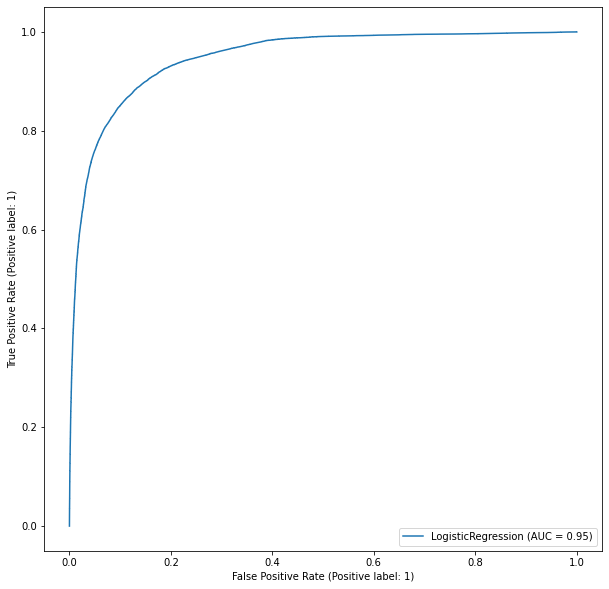

In [647]:
#ROC curve
from sklearn.metrics import RocCurveDisplay, auc, roc_auc_score
fig, ax = plt.subplots(figsize=(10, 10))
RocCurveDisplay.from_estimator(logReg, X_test, y_test, ax=ax)

In [649]:
#K folds cross validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(logReg, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', score)

Cross-Validation Accuracy Scores [0.88867135 0.8896436  0.88984191 0.89106722 0.88906943]


In [662]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     63594
           1       0.85      0.80      0.82     30261

    accuracy                           0.89     93855
   macro avg       0.88      0.87      0.87     93855
weighted avg       0.89      0.89      0.89     93855



In [650]:
#import pickle

In [651]:
#saving model
#with open('logreg_17_model', 'wb') as f:
    #pickle.dump(logReg, f)

In [652]:
preds = logReg.predict_proba(X)

In [653]:
preds

array([[0.97834805, 0.02165195],
       [0.9816011 , 0.0183989 ],
       [0.98197284, 0.01802716],
       ...,
       [0.98176966, 0.01823034],
       [0.88749605, 0.11250395],
       [0.97857351, 0.02142649]])